In [1]:
import h2o
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from sklearn.metrics import accuracy_score

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.3 (build 10.0.1+10, mixed mode)
  Starting server from C:\Users\N1\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\N1\AppData\Local\Temp\tmp32ua168z
  JVM stdout: C:\Users\N1\AppData\Local\Temp\tmp32ua168z\h2o_N1_started_from_python.out
  JVM stderr: C:\Users\N1\AppData\Local\Temp\tmp32ua168z\h2o_N1_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Europe/Helsinki
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.3
H2O cluster version age:,4 days
H2O cluster name:,H2O_from_python_N1_x7rmok
H2O cluster total nodes:,1
H2O cluster free memory:,1.971 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [3]:
data = h2o.import_file("data2.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
#delete null labels

nan_frame = data.isna().group_by(by = ['isNA(labels)']).count().get_frame()
nan_frame

isNA(labels),nrow
0,916
1,84


In [5]:
data = data.na_omit()
data.group_by(by = "category").count().get_frame()

category,nrow
automotive,91
beauty,91
digital_electronics,88
kids,91
man,90
military,91
perfumes,94
shoes,96
sport,93
woman,91


In [6]:
data.head(3)

C1,path,labels,category
0,https://www.synopsys.com/content/dam/synopsys/verification/Veification_SaberAutomotive_spotlight.jpg.imgw.560.336.jpg,Land vehicle Vehicle Car Sports car Automotive design Coup? Performance car Supercar Luxury vehicle Aston martin dbs v12,automotive
1,https://cdn.rohde-schwarz.com/pws/solution/automotive_1/webinarcenter/automotive_webinars_teaser.jpg,Land vehicle Automotive design Mid-size car Vehicle Car Personal luxury car Concept car Full-size car Executive car Family car,automotive
2,https://blokt.com/wp-content/uploads/2018/08/shutterstock_747021289.jpg,Land vehicle Vehicle Car Personal luxury car Luxury vehicle Automotive design Performance car Bmw Sports car Rim,automotive


In [7]:
def preprocessor(line):
    return line.lower()

vectorizer = CountVectorizer(preprocessor = preprocessor, stop_words = "english")
vectorized = vectorizer.fit_transform(data.as_data_frame()["labels"]).todense()

data_labels = h2o.H2OFrame.from_python(pd.DataFrame(data=vectorized, columns=sorted(vectorizer.vocabulary_)))

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
data = data.drop(["labels"])
data = data_labels.cbind(data)
paths = data["path"]
data = data.drop(["path", "C1"])

In [9]:
data.shape

(916, 862)

In [10]:
data.head(3)

3d,47,abdomen,accessory,acrobatic,action,active,adaptation,adventure,advertising,aerospace,afro,aftershave,air,aircraft,airman,airplane,album,alcoholic,alloy,alpine,amber,american,amusement,animal,animated,animation,ankle,appliance,aqua,archery,architecture,area,arena,arm,army,arrow,art,artificial,artist,arts,artwork,asphalt,assembly,aston,athlete,athletic,athletics,atlas,atmosphere,atmospheric,audi,audience,audio,auto,automobile,automotive,autumn,aviation,axle,azure,baby,backlighting,backyard,badminton,ball,ballet,balloon,bandy,banner,barbell,barechested,barware,basic,basketball,bat,beaker,beanie,beard,bearing,beater,beauty,beige,beverage,biathlon,bicycle,bike,biking,binding,birthday,black,blackboard,blazer,blended,blond,blue,bmw,bmx,boardsport,boat,boeing,book,boot,botany,bottle,bow,bowl,box,brand,brass,breaststroke,breed,bridal,bridle,brown,brushing,building,bumper,business,businessperson,butterfly,button,cable,cables,calendar,calf,calligraphy,camera,camouflage,canadian,canidae,car,care,carmine,carnivore,cartoon,ceiling,celebrating,center,cg,ch,champions,championship,character,cheek,cheering,chest,child,chin,chinook,cinematographer,circle,circuit,citro,citrus,city,cityscape,clap,class,classic,cleat,climbing,clip,clock,close,clothing,cloud,clutch,coach,cobalt,cocktail,collar,college,collision,colorfulness,coloring,combat,commercial,commissioned,communication,communications,community,compact,companion,competition,component,compositing,computer,concept,confetti,congestion,console,convertible,cook,cool,cosmetics,costume,cotton,country,coup
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# split data

splits = data.split_frame([0.9], seed = 1)
train = splits[0]
test = splits[1]

predictors = data.col_names[:-1]
response = "category"

## Train first model

In [12]:
gbm_model = H2ORandomForestEstimator(distribution="multinomial", seed = 123)

In [13]:
gbm_model.train(predictors, response, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [14]:
gbm_model.summary().as_data_frame()

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,500.0,224270.0,1.0,20.0,16.772,2.0,71.0,30.056


In [15]:
# confusion_matrix for test/train data
gbm_model.confusion_matrix(test).as_data_frame()

,automotive,beauty,digital_electronics,kids,man,military,perfumes,shoes,sport,woman,Error,Rate
0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 8
1,0.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,1 / 10
2,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 12
3,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.142857,1 / 7
4,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 7
5,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.000000,0 / 7
6,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.000000,0 / 4
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.000000,0 / 18
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.125000,1 / 8
9,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.500000,4 / 8


In [16]:
# error for train data

print("R2 error: {}".format(gbm_model.r2()))
print("MSE error: {}".format(gbm_model.mse()))
print("1 - MSE error: {}".format(1- gbm_model.mse()))

R2 error: 0.9849712166198512
MSE error: 0.12338808948244873
1 - MSE error: 0.8766119105175513


In [17]:
# error for test data

test_model = gbm_model.model_performance(test)
print("R2 error: {}".format(test_model.r2()))
print("MSE error: {}".format(test_model.mse()))
print("1 - MSE error: {}".format(1 - test_model.mse()))

R2 error: 0.9854155758834503
MSE error: 0.12455956211142413
1 - MSE error: 0.8754404378885758


In [18]:
# accuracy score 

predictions = gbm_model.predict(test)["predict"][:,0].as_data_frame()
real = test["category"][:,0].as_data_frame()
print("accuracy_score: {}".format(accuracy_score(real, predictions)))

drf prediction progress: |████████████████████████████████████████████████| 100%
accuracy_score: 0.9213483146067416


## Do some feature engineering and selection here

In [19]:
# delete not important features with Kbest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

gbm_model = H2ORandomForestEstimator(distribution="multinomial", seed = 123)

X = train[train.col_names[:-1]].as_data_frame()  
y = train["category"].as_data_frame()    

acc = []
acc_score = 0

Kfrom = 10
Kto = 800
Kstep = 20

for k in range(Kfrom, Kto, Kstep):
    selection = SelectKBest(score_func=chi2, k=k)
    fit = selection.fit(X,y)
    new_X = selection.fit(X,y).transform(X)
    
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Features','Score']
    best_features = featureScores.nlargest(k,'Score')
    
    Ktrain = train[list(best_features["Features"])+["category"]]
    Ktest = test[list(best_features["Features"])+["category"]]

    Kpredictors = Ktrain.col_names[:-1]
    Kresponse = "category"
    
    gbm_model.train(Kpredictors, Kresponse, training_frame=Ktrain)

    predictions = gbm_model.predict(Ktest)["predict"][:,0].as_data_frame()
    real = Ktest["category"][:,0].as_data_frame()
    acc.append(accuracy_score(real, predictions))
    if (accuracy_score(real, predictions) > acc_score):
        print(k)
        acc_score = accuracy_score(real, predictions)
        new_train = Ktrain
        new_test = Ktest
    print("accuracy_score: {}".format(accuracy_score(real, predictions)))

drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
10
accuracy_score: 0.5617977528089888
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
30
accuracy_score: 0.7303370786516854
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
50
accuracy_score: 0.8314606741573034
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
accuracy_score: 0.7865168539325843
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
90
accuracy_score: 0.8651685393258427
drf

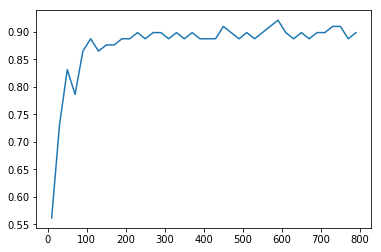

In [20]:
plt.plot(list(range(Kfrom, Kto, Kstep)), acc)
plt.show()

In [21]:
bestK = (acc.index(max(acc))+1)*Kstep - Kfrom
print("Leave only {} labels".format(bestK))

Leave only 590 labels


In [22]:
train = new_train
test = new_test

predictors = test.col_names[:-1]
response = "category"

## Tune parameters of the model

In [75]:
from h2o.grid.grid_search import H2OGridSearch

params = {'max_depth' : list(range(20,40,2))}
gbm_grid = H2ORandomForestEstimator(ntrees = 100, seed = 123)
grid = H2OGridSearch(gbm_grid, params,
                         grid_id = 'depth_grid')
grid.train(x = predictors, y = response, training_frame = train, validation_frame = test)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [76]:
grid.get_grid(sort_by = 'mse')

     max_depth            model_ids                  mse
0           28  depth_grid_model_14  0.12136299194538416
1           30  depth_grid_model_20  0.12144253827393725
2           26  depth_grid_model_13  0.12146095315679112
3           24  depth_grid_model_12   0.1216042139776856
4           32  depth_grid_model_21  0.12169154813064834
5           34  depth_grid_model_22  0.12192425353372302
6           36  depth_grid_model_23   0.1221906954972317
7           22  depth_grid_model_11   0.1224743756608249
8           38  depth_grid_model_24  0.12274254008243768
9           20  depth_grid_model_10  0.12348708526829077
10          18   depth_grid_model_9  0.12364744757214328
11          16   depth_grid_model_8  0.12579070238789075
12          14   depth_grid_model_7  0.12954423981948576
13          12   depth_grid_model_6  0.13668677971459892
14          10   depth_grid_model_5  0.14951772372507263
15           8   depth_grid_model_4  0.16978661991711352
16           6   depth_grid_mod

In [24]:
from h2o.grid.grid_search import H2OGridSearch

params = {'max_depth' : list(range(24,34,1)),
          "ntrees": [50,100,200,300],
          "histogram_type": ["uniform_adaptive", "random", "quantiles_global", "round_robin"]}

gbm_grid = H2ORandomForestEstimator(seed = 123, stopping_metric = "mse", max_runtime_secs = 5*60,
                                   keep_cross_validation_predictions = True)
grid = H2OGridSearch(gbm_grid, params,
                         grid_id = 'depth_grid')
grid.train(x = predictors, y = response, training_frame = train, validation_frame = test)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [28]:
final_grid = grid.get_grid(sort_by = 'mse')
best_model = h2o.get_model(final_grid.sorted_metric_table()['model_ids'][0])

In [31]:
# error for test data

test_model = best_model.model_performance(test)
print("R2 error: {}".format(test_model.r2()))
print("MSE error: {}".format(test_model.mse()))
print("1 - MSE error: {}".format(1 - test_model.mse()))

# accuracy score 

predictions = best_model.predict(test)["predict"][:,0].as_data_frame() #0.8488372093023255
real = test["category"][:,0].as_data_frame()
print("accuracy_score: {}".format(accuracy_score(real, predictions)))  

R2 error: 0.9863332474593643
MSE error: 0.11672210697815999
1 - MSE error: 0.88327789302184
drf prediction progress: |████████████████████████████████████████████████| 100%
accuracy_score: 0.9101123595505618
